1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

there are two global minima
the first global minimum is :  [ 0.08984192 -0.71265669]  and the value of the function is: -1.0316284534891569
the second global minimum is :  [-0.08984201  0.71265639]  and the value of the function is: -1.0316284534898759
for initial point (0,0) the value of the function is: 0.0


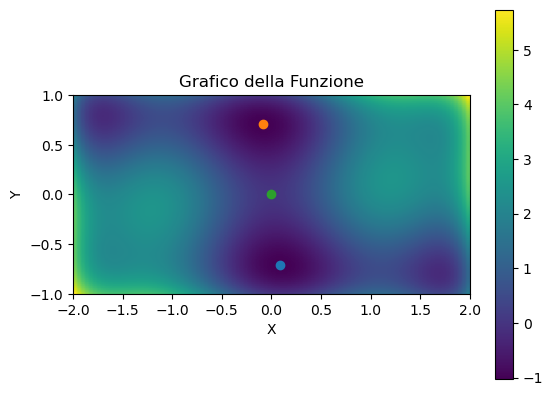

In [38]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

dom_x = np.linspace(-2,2,100)
dom_y = np.linspace(-1,1,100)
def f(x):
    return(4-2.1*(x[0]**2)+(x[0]**4)/3)*(x[0]**2)+x[0]*x[1]+(4*(x[1]**2)-4)*(x[1]**2)



x,y = np.meshgrid(dom_x,dom_y)
z = f([x,y])

plt.imshow(z, cmap='viridis', extent=[-2, 2, -1, 1], origin="lower")  
plt.colorbar()  
plt.title('Grafico della Funzione')
plt.xlabel('X')
plt.ylabel('Y')


x0 = 0.8
y0=-0.7
sol = optimize.minimize(f,[x0,y0])
sol2 = optimize.minimize(f,[x0,-y0] ) 


print('there are two global minima')
print('the first global minimum is : ' , sol['x'], ' and the value of the function is:' ,f(sol['x']))
print('the second global minimum is : ',sol2['x'], ' and the value of the function is:' ,f(sol2['x']))
  
plt.scatter(sol['x'][0],sol['x'][1])
plt.scatter(sol2['x'][0],sol2['x'][1])  


#What happens for an initial guess of  (𝑥,𝑦)=(0,0)
x0 = 0
y0 = 0
sol3 = optimize.minimize(f,[x0,y0])
plt.scatter(sol3['x'][0],sol3['x'][1])  

print('for initial point (0,0) the value of the function is:' ,f(sol3['x']))
  

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Text(0.5, 1.0, 'theta/omega and time')

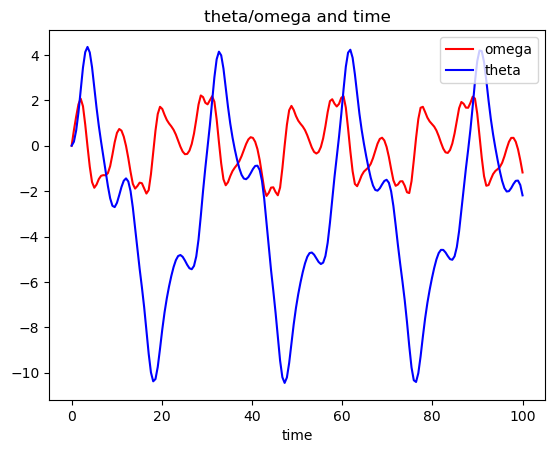

In [92]:
from scipy.integrate import odeint
import math

def derivative(X,time,l,Q,d,g,omega):
    return (X[1],(-1/Q)*X[1] + (g/l)*math.sin(X[0]) + d*math.cos(omega*time))

omega = 0.65
d = 1.5
l = 10
Q=2.0
g = 9.81
X0=[0,0]
#X=[theta,omega]

time = np.linspace(0,100,200)
X = odeint(derivative,X0,time,args= (l,Q,d,g,omega))

plt.figure()
plt.plot(time,X[:,1],'r')
plt.xlabel('time')
plt.plot(time,X[:,0],'b')
plt.legend(['omega', 'theta'], loc=1)
plt.title('theta/omega and time')




3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

C:\Users\Gasba Family\AppData\Local\Temp\ipykernel_14432\961586059.py:21: RuntimeWarning: divide by zero encountered in divide
  periods = 1/dom


Text(0, 0.5, 'FFT ')

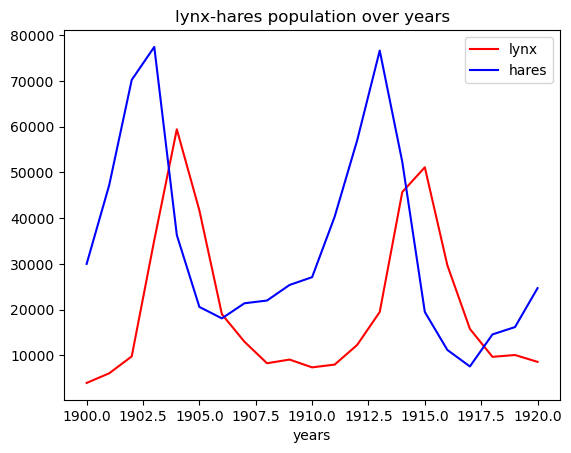

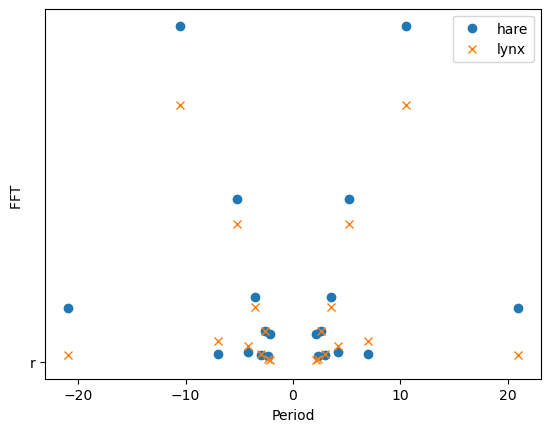

In [147]:
from scipy import fftpack

filename = 'data/populations.txt'
deli = '\\' 
file = np.genfromtxt(filename)
time = file[:,0]
lynx = file[:,2]
hare = file[:,1]

plt.figure()
plt.plot(time, lynx, 'r')
plt.plot(time, hare, 'b')
plt.legend(['lynx', 'hares'], loc=1)
plt.title('lynx-hares population over years')
plt.xlabel('years')


tras = fftpack.fft(hare)
dom = fftpack.fftfreq(len(time))
power = np.abs(tras)
periods = 1/dom

tras2 =  fftpack.fft(lynx)
power2 = np.abs(tras2)

plt.figure()
plt.plot(periods, power,'o')
plt.plot(periods, power2, 'x','r' )
plt.legend(['hare', 'lynx'], loc=1)
plt.xlabel('Period')
plt.ylabel('FFT ')



4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

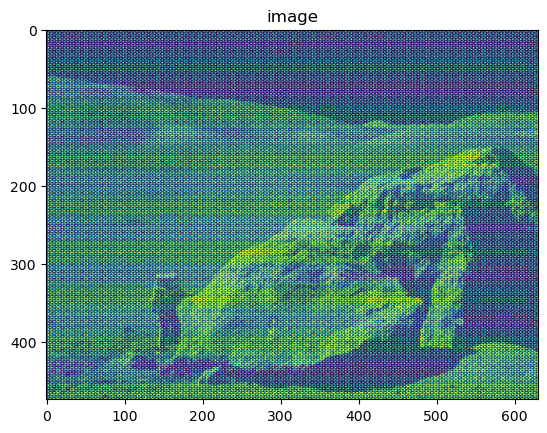

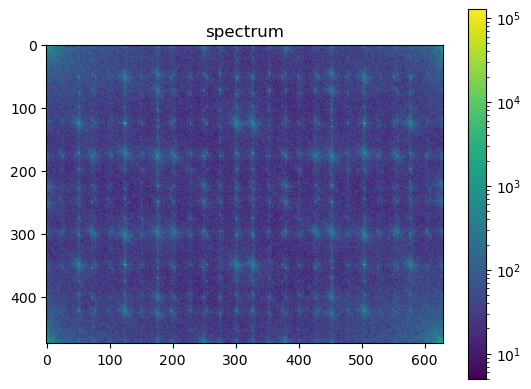

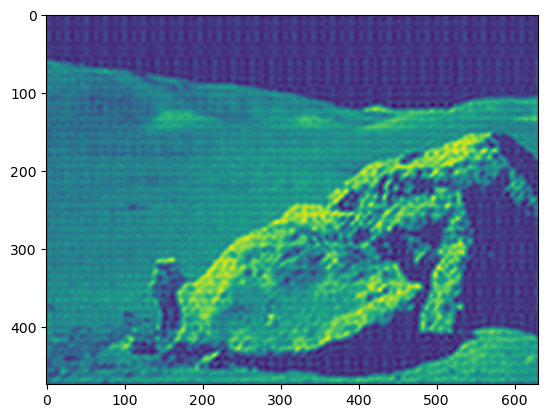

In [146]:
from matplotlib.colors import LogNorm

image = plt.imread("images/moonlanding.png")
plt.figure()
plt.imshow(image)
plt.title('image')
y,x = image.shape
time = x

#trasfromata 2d
tras = fftpack.fft2(image)
power = np.abs(tras)

plt.figure()
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('spectrum')


#lascio solo gli angoli
keep_fraction = 0.1
im_fft2 = tras.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0   
filtered_image = fftpack.ifft2(im_fft2)
real_filtered_signal = np.real(filtered_image)


plt.figure()
plt.imshow(real_filtered_signal)
plt.title('filtred image')